In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### OpenCV
- Open Source Computer Vision Library는 오픈소스 이미지(동영상) 라이브러리
- 이미지 형식 변환, 필터 처리, 얼굴 인식, 물체 인식, 문자 인식 등 이미지와 관련된 다양한 처리
- 머신러닝에서 OpenCV 사용 : 머신러닝의 입력으로 전달하려면 이미지를 숫자 배열 데이터로 변경
- pip install opencv-python

In [8]:
!pwd

/content


In [9]:
%cd /content

/content


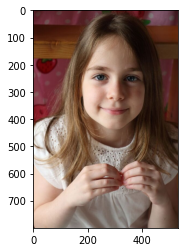

True

In [10]:
## 다운로드한 이미지 출력하기 
import matplotlib.pyplot as plt
import cv2

filepath = '/content/drive/MyDrive/girl.png'
img =cv2.imread(filepath)
# plt.axis('off') # axis 출력 끄기
# OpenCv BGR(파녹빨)인 반면 matplotlib RGB(빨녹파)이다
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 저장하기 

cv2.imwrite("/content/drive/MyDrive/girl1.png", img)

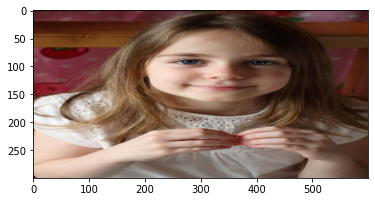

In [11]:
filepath = '/content/drive/MyDrive/girl1.png'
img =cv2.imread(filepath)


im2 =cv2.resize(img, (600,300))# img, (넓이, 높이)

cv2.imwrite('/content/drive/MyDrive/out-resize.png', im2)

plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

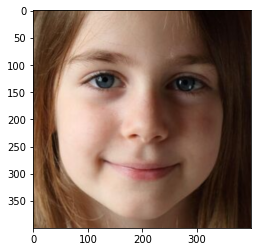

In [ ]:
# 읽기 
filepath = '/content/drive/MyDrive/girl1.png'
img =cv2.imread(filepath)
# 자르기
im3 = img[150:450, 150:450] # y1:y2 , x1:x2
# 이미지 크기 변경
im3 =cv2.resize(im3, (400,400))
# 이미지 저장하기 
cv2.imwrite('/content/drive/MyDrive/cut-resize.png', im3)
# 이미지 출력하기
plt.imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))

plt.show()

#### 얼굴 검출 - 자동으로 얼굴에 모자이크 처리
- 인간의 얼굴이 어디 있는지 검출
- 사람의 얼굴을 검출하고 자동으로 모자이크 처리\
사생활 보호를 위해 관계없는 사람의 얼굴 자동으로 모자이크 처리\
얼굴 인식을 사용해 사람 얼굴이 있는 사진을 자동으로 수집

[얼굴 검출 캐스케이드-얼굴 요소 데이터베이스]https://github.com/opencv/opencv/tree/master/data/haarcascades

얼굴의 좌표 = 149 127 316 316


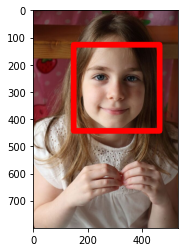

In [29]:
# 캐스케이드 파일 지정해서 검출기 생성하기
# OpenCV는 Haar-like 특징 학습기라고 부르는 머신러닝을 사용해 얼굴 인식
# 캐스케이드 파일(얼굴 요소 DB)를 사용해 눈, 코, 잎과 같은 요소의 위치 관계를 확인하고 얼굴인지 확인
# https://github.com/opencv/opencv/tree/master/data/haarcascades
# 얼굴 검출 전용 캐스케이드 파일 외 정면 얼굴, 웃는 얼굴, 눈, 몸 전체를 검출하는 다양한 캐스케이드 파일
cascade_file = "/content/drive/MyDrive/haarcascade_frontalface_alt.xml" # 정면 얼굴
cascade = cv2.CascadeClassifier(cascade_file) # 검출기는 캐스캐이드 파일을 지정해 다양한 물체 검출

# 이미지를 읽어 들이고 그레이스케일로 변환하기
# 밝은 부분은 흰색, 어두운 부분은 검은색. 코는 밝은 부분, 코의 양옆은 어두운 부분 - 그레이 스케알 인식
# 코의 밝은 부분 흰색 어두운 부분 검은색으로 인식하기 
# 얼굴 영역중에 중앙에 밝은 부분이 있다면 얼굴로 판단. 각 요소의 명암패턴을 결합해 얼굴의 형태 확인

filepath = '/content/drive/MyDrive/girl.png'
img =cv2.imread(filepath)
img_gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 그레이 스케일로 변환하기 

# 얼굴 인식하기 (cascade.detectMultiScale( )메서드 사용)
face_list =cascade.detectMultiScale(img_gray, minSize=(150,150))# 그레이스케일 이미지데이터, 얼굴 인식영역의 최소크기 지정

# 결과 확인하기
if len(face_list) ==0:
  print("얼굴 인식 실패")
  quit()
# 인식한 부분 표시하기 # 검출한 얼굴 영역에 붉은색 테두디를 랜더링
for (x,y,w,h) in face_list:
  print("얼굴의 좌표 =", x,y,w,h) # 얼굴 좌표 4개검출됨 
  red = (0,0,255)
  cv2.rectangle(img, (x,y), (x+w, y+h),red, thickness =20 )

# 이미지 출력하기
cv2.imwrite('/content/drive/MyDrive/face-detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 이미지 블러 처리는 이미지를 축소한다.
# mosaic.py 
import cv2

def mosic(img,rect, size):
  # 모자이크 적용할 부분 추출하기
  (x1, y1,x2,y2) =rect
  w= x2-x1
  h= y2-y1
  i_rect =img[y1:y2, x1:x2]
  # 축소하고 확대하기
  i_small =cv2.resize(i_rect, (size, size))
  i_mos = cv2.resize(i_small, (w,h), interpolation =cv2.INTER_AREA)
  # 모자이크 적용하기
  img2 = img.copy()
  img2[y1:y2, x1:x2] =i_mos
  return img2
# rect은 모자이크 적용할 부분  i_rect 부분에 대한 모자이크 처리정도 조정 cv2.inter은 줄임  img2에 모자이크 처리된 imos적용해서 함 


In [3]:
# 모듈 업로드 # 경로에 띄어쓰기 있으면 안된다.
!cp /content/drive/MyDrive/mosaic.py /content  # 한칸 뛰는 것이 중요하다.

In [4]:
!ls

drive  mosaic.py  __pycache__  sample_data


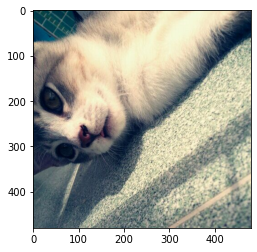

In [12]:
img = cv2.imread('/content/drive/MyDrive/cat.png')

# 이미지 출력하기
cv2.imwrite('/content/drive/MyDrive/cat.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

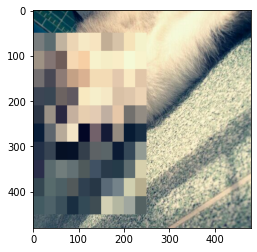

In [13]:
# 모자이크는 대각선 주면 된다. 10은 모자이크 처리 정도이다. 30은 모자이크 덜된다.

import cv2
from mosaic import mosaic as mosaic

img = cv2.imread('/content/drive/MyDrive/cat.png')
mos =mosaic(img, (0,50,250,450),10)
                  # 0 50 세로, 450 250 x 축이다.
    # 이미지 츨력하기               
cv2.imwrite('/content/drive/MyDrive/cat_mosaic.png' ,mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()


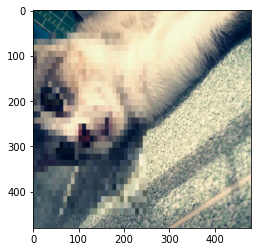

In [34]:
import cv2
from mosaic import mosaic as mosaic

img = cv2.imread('/content/drive/MyDrive/cat.png')
mos =mosaic(img, (0,50,250,450),30)
                  # 0 50 세로, 450 250 x 축이다.
    # 이미지 츨력하기               
cv2.imwrite('/content/drive/MyDrive/cat_mosaic.png' ,mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()


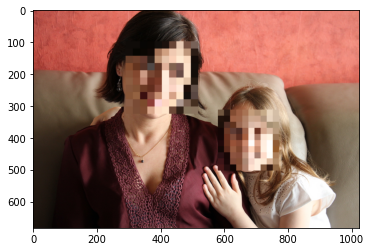

In [35]:
# 사람얼굴 자동으로 모자이크 처리하기
# 캐스케이드 파일 지정해서 검출기 생성하기
cascade_file = "/content/drive/MyDrive/haarcascade_frontalface_alt.xml" # 정면 얼굴
cascade = cv2.CascadeClassifier(cascade_file) # 검출기는 캐스캐이드 파일을 지정해 다양한 물체 검출


# 이미지를 익어 들이고 그레이스케일로 변환하기
img = cv2.imread('/content/drive/MyDrive/family.jpg')
#img =cv2.imread(filepath)
img_gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 그레이 스케일로 변환하기 



# 얼굴 검출하기
face_list =cascade.detectMultiScale(img_gray, minSize=(150,150))# 그레이스케일 이미지데이터, 얼굴 인식영역의 최소크기 지정
if len(face_list) ==0: quit()

# 인식한 부분 모자이크 처리하기
for (x,y,w,h) in face_list:
  img =mosaic(img, ( x,y,x+w,y+h),10) 

# 이미지 출력하기
cv2.imwrite('/content/drive/MyDrive/family-mosaic.jpg' ,img) # 저장
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# 출력
plt.show()




# Q. 5명이상 얼굴 사진이 들어있는 이미지를 다운로드 받아서 모아이크 처리하세요 

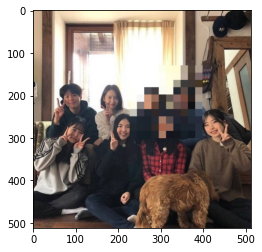

<Figure size 1080x1080 with 0 Axes>

In [22]:
import cv2
# 사람얼굴 자동으로 모자이크 처리하기
# 캐스케이드 파일 지정해서 검출기 생성하기
cascade_file = "/content/drive/MyDrive/haarcascade_frontalface_alt.xml" # 정면 얼굴
cascade = cv2.CascadeClassifier(cascade_file) # 검출기는 캐스캐이드 파일을 지정해 다양한 물체 검출


# 이미지를 익어 들이고 그레이스케일로 변환하기
img = cv2.imread('/content/drive/MyDrive/효리네민박.jfif')
#img =cv2.imread(filepath)
img_gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 그레이 스케일로 변환하기 



# 얼굴 검출하기
face_list =cascade.detectMultiScale(img_gray, minSize=(150,150))# 그레이스케일 이미지데이터, 얼굴 인식영역의 최소크기 지정
if len(face_list) ==0: quit()

# 인식한 부분 모자이크 처리하기
for (x,y,w,h) in face_list:
  img =mosaic(img, ( x,y,x+w,y+h),10) 

# 이미지 출력하기
cv2.imwrite('/content/drive/MyDrive/mosaic.jpg' ,img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# 출력
plt.figure(figsize=(15,15))
plt.show()




#### Q.'girl.jpg' 사진을 읽어 와서 다음 사항을 수행하세요

- 얼굴을 검출하고 
- 

---0---
얼굴의 좌표= 135 109 352 352
---10---
얼굴의 좌표= 174 149 350 350
---20---
얼굴의 좌표= 198 177 362 362
---30---
---40---
---50---
---60---
---70---
---80---


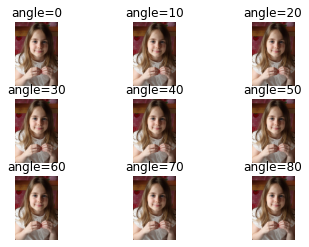

In [19]:
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
# 검출기 생성하고 이미지 읽어 들이기
cascade_file = "/content/drive/MyDrive/haarcascade_frontalface_alt.xml" # 정면 얼굴
cascade = cv2.CascadeClassifier(cascade_file) # 검출기는 캐스캐이드 파일을 지정해 다양한 물체 검출
img=cv2.imread('/content/drive/MyDrive/girl.png')

# 얼굴 검출하고 영역표시하기
def face_detect(img):  
    img_gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 그레이 스케일로 변환하기 
    face_list =cascade.detectMultiScale(img_gray, minSize=(300,300))# 그레이스케일 이미지데이터, 얼굴 인식영역의 최소크기 지정
    # 인식한 부분 표시하기
    for (x,y,w,h) in face_list:
      print("얼굴의 좌표=", x,y,w,h)
      red = (0,0,255)
      cv2.rectangle(img, (x,y), (x+w, y+h),red, thickness =300 )

# 여러 각도의 이미지를 만들고 출력하기

for i in range(0,9):
  ang = i*10
  print("---"+str(ang)+"---")
  img_r = ndimage.rotate(img,ang)
  face_detect(img_r)
  plt.subplot(3,3,i+1)
  plt.axis("off")
  plt.title("angle="+str(ang))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))# 출력


plt.show()


---0---
얼굴의 좌표= 135 109 352 352
---10---
얼굴의 좌표= 174 149 350 350
---20---
얼굴의 좌표= 198 177 362 362
---30---
---40---
---50---
---60---
---70---
---80---


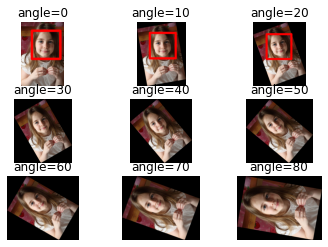

In [24]:
# OpenCV의 얼굴 검출은 옆모습과 기울어진 얼굴을 잘 검출 못함
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# 검출기 생성하고 이미지 읽어 들이기
cascade_file = "/content/drive/MyDrive/haarcascade_frontalface_alt.xml" # 정면 얼굴
cascade = cv2.CascadeClassifier(cascade_file)
img=cv2.imread('/content/drive/MyDrive/girl.png')

# 얼굴 검출하고 영역 표시하기
def face_detect(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))

  # 인식한 부분 표시하기
  for (x,y,w,h) in face_list:
    print('얼굴의 좌표=', x,y,w,h)
    red = (0,0,255)
    cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=30)

# 여러 각도의 이미지를 만들고 테스트하기
for i in range(0,9):
    ang = i * 10
    print('---' + str(ang) + '---')
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.title('angle=' + str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

plt.show()
